### Custom BERT implementation

In [1]:
%cd ../..
import torch
from inpainting.models import FOOBERT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST
from inpainting.utils import configure_environment

configure_environment()

/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/ventus/image-inpainting


/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 91353


Device set to cuda


In [2]:
mnist = MNIST(frac=0.05, clusters=35, unimask=False, shape=2)
weights = 1/mnist.distribution

In [3]:
model = FOOBERT(
    vocab_size = mnist.tokens,                      # BERT's vocabulary size
    embed_size = mnist.tokens * 12,                 # Hidden size
    num_layers = 8,                                 # Number of Transformer layers
    num_heads = 12,                                 # Numbertargets of attention heads
    ff_hidden = 3200,                               # Feed-forward hidden size
    max_len = (28//mnist.shape)**2,                 # Maximum sequence length
    dropout = 0.00,
	# ce_weights=weights,
	patches=mnist.itop(torch.arange(mnist.clusters)),
)

In [4]:
Trainer(model, mnist).train(epochs=50, batch_size=100, lr=2e-4)

running on device cuda
Epoch: 0.00	RMSE: 79.14	Loss: 4.41e+03	Learning Rate: 1.99e-04
Epoch: 0.00	RMSE: 62.62	Loss: 2.93e+03	Learning Rate: 1.97e-04
Epoch: 0.00	RMSE: 54.35	Loss: 2.28e+03	Learning Rate: 1.96e-04
Epoch: 1.00	RMSE: 53.13	Loss: 2.01e+03	Learning Rate: 1.95e-04
Epoch: 1.00	RMSE: 50.21	Loss: 2.15e+03	Learning Rate: 1.93e-04
Epoch: 1.00	RMSE: 48.52	Loss: 1.96e+03	Learning Rate: 1.92e-04
Epoch: 2.00	RMSE: 47.50	Loss: 1.76e+03	Learning Rate: 1.91e-04
Epoch: 2.00	RMSE: 47.33	Loss: 1.55e+03	Learning Rate: 1.89e-04
Epoch: 2.00	RMSE: 47.53	Loss: 1.46e+03	Learning Rate: 1.88e-04
Epoch: 3.00	RMSE: 48.21	Loss: 1.64e+03	Learning Rate: 1.87e-04
Epoch: 3.00	RMSE: 48.01	Loss: 1.39e+03	Learning Rate: 1.85e-04
Epoch: 3.00	RMSE: 46.61	Loss: 1.28e+03	Learning Rate: 1.84e-04
Epoch: 4.00	RMSE: 43.76	Loss: 1.08e+03	Learning Rate: 1.83e-04
Epoch: 4.00	RMSE: 38.60	Loss: 9.11e+02	Learning Rate: 1.81e-04
Epoch: 4.00	RMSE: 37.07	Loss: 8.20e+02	Learning Rate: 1.80e-04
Epoch: 5.00	RMSE: 35.54	Loss: 7.

Traceback (most recent call last):
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/usr/lib64/python3.12/shutil.py", line 759, in rmtree
    _rmtree_safe_fd(stack, onexc)
  File "/usr/lib64/python3.12/shutil.py", line 703, in _rmtree_safe_fd
    onexc(func, path, err)
  File "/usr/lib64/python3.12/shutil.py", line 750, in onexc
    return onerror(func, path, exc_info)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/shutil.py", line 662, in _rmtree_safe_fd
    os.rmdir(name, dir_fd=dirfd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-dukx30ek'


Epoch: 28.00	RMSE: 29.39	Loss: 4.53e+02	Learning Rate: 8.40e-05
Epoch: 29.00	RMSE: 28.18	Loss: 4.00e+02	Learning Rate: 8.27e-05
Epoch: 29.00	RMSE: 28.30	Loss: 4.03e+02	Learning Rate: 8.13e-05
Epoch: 29.00	RMSE: 27.52	Loss: 3.88e+02	Learning Rate: 8.00e-05
Epoch: 30.00	RMSE: 28.31	Loss: 4.29e+02	Learning Rate: 7.87e-05
Epoch: 30.00	RMSE: 26.23	Loss: 3.52e+02	Learning Rate: 7.73e-05
Epoch: 30.00	RMSE: 27.94	Loss: 3.87e+02	Learning Rate: 7.60e-05
Epoch: 31.00	RMSE: 28.46	Loss: 4.40e+02	Learning Rate: 7.47e-05
Epoch: 31.00	RMSE: 27.77	Loss: 4.07e+02	Learning Rate: 7.33e-05
Epoch: 31.00	RMSE: 27.92	Loss: 4.12e+02	Learning Rate: 7.20e-05
Epoch: 32.00	RMSE: 27.88	Loss: 4.07e+02	Learning Rate: 7.07e-05
Epoch: 32.00	RMSE: 27.39	Loss: 3.91e+02	Learning Rate: 6.93e-05
Epoch: 32.00	RMSE: 26.38	Loss: 3.58e+02	Learning Rate: 6.80e-05
Epoch: 33.00	RMSE: 29.18	Loss: 4.29e+02	Learning Rate: 6.67e-05
Epoch: 33.00	RMSE: 27.10	Loss: 3.72e+02	Learning Rate: 6.53e-05
Epoch: 33.00	RMSE: 27.51	Loss: 3.92e+02	

Traceback (most recent call last):
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/usr/lib64/python3.12/shutil.py", line 759, in rmtree
    _rmtree_safe_fd(stack, onexc)
  File "/usr/lib64/python3.12/shutil.py", line 703, in _rmtree_safe_fd
    onexc(func, path, err)
  File "/usr/lib64/python3.12/shutil.py", line 750, in onexc
    return onerror(func, path, exc_info)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/shutil.py", line 662, in _rmtree_safe_fd
    os.rmdir(name, dir_fd=dirfd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-67amd61z'


Epoch: 35.00	RMSE: 26.93	Loss: 3.66e+02	Learning Rate: 5.87e-05
Epoch: 35.00	RMSE: 26.84	Loss: 3.65e+02	Learning Rate: 5.73e-05
Epoch: 35.00	RMSE: 27.23	Loss: 3.80e+02	Learning Rate: 5.60e-05
Epoch: 36.00	RMSE: 28.05	Loss: 4.05e+02	Learning Rate: 5.47e-05
Epoch: 36.00	RMSE: 27.55	Loss: 3.67e+02	Learning Rate: 5.33e-05
Epoch: 36.00	RMSE: 27.34	Loss: 3.79e+02	Learning Rate: 5.20e-05
Epoch: 37.00	RMSE: 26.68	Loss: 3.62e+02	Learning Rate: 5.07e-05
Epoch: 37.00	RMSE: 27.94	Loss: 3.92e+02	Learning Rate: 4.93e-05
Epoch: 37.00	RMSE: 27.44	Loss: 3.64e+02	Learning Rate: 4.80e-05
Epoch: 38.00	RMSE: 28.56	Loss: 4.16e+02	Learning Rate: 4.67e-05
Epoch: 38.00	RMSE: 26.53	Loss: 3.65e+02	Learning Rate: 4.53e-05
Epoch: 38.00	RMSE: 28.54	Loss: 4.20e+02	Learning Rate: 4.40e-05
Epoch: 39.00	RMSE: 26.19	Loss: 3.26e+02	Learning Rate: 4.27e-05
Epoch: 39.00	RMSE: 27.61	Loss: 3.77e+02	Learning Rate: 4.13e-05
Epoch: 39.00	RMSE: 27.57	Loss: 3.82e+02	Learning Rate: 4.00e-05
Epoch: 40.00	RMSE: 28.42	Loss: 3.98e+02	

Traceback (most recent call last):
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/usr/lib64/python3.12/shutil.py", line 759, in rmtree
    _rmtree_safe_fd(stack, onexc)
  File "/usr/lib64/python3.12/shutil.py", line 703, in _rmtree_safe_fd
    onexc(func, path, err)
  File "/usr/lib64/python3.12/shutil.py", line 750, in onexc
    return onerror(func, path, exc_info)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/shutil.py", line 662, in _rmtree_safe_fd
    os.rmdir(name, dir_fd=dirfd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-l0roedu1'


Epoch: 48.00	RMSE: 26.13	Loss: 3.34e+02	Learning Rate: 4.00e-06
Epoch: 49.00	RMSE: 26.40	Loss: 3.42e+02	Learning Rate: 2.67e-06
Epoch: 49.00	RMSE: 26.10	Loss: 3.30e+02	Learning Rate: 1.33e-06
Epoch: 49.00	RMSE: 26.30	Loss: 3.51e+02	Learning Rate: 0.00e+00


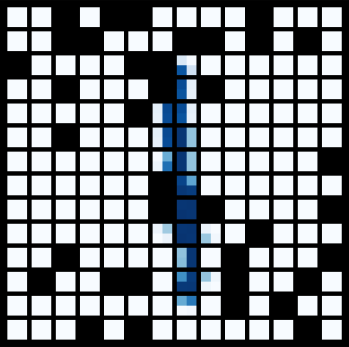

In [9]:
x = mnist[8]["input_ids"]
mnist.plot_sample(x)

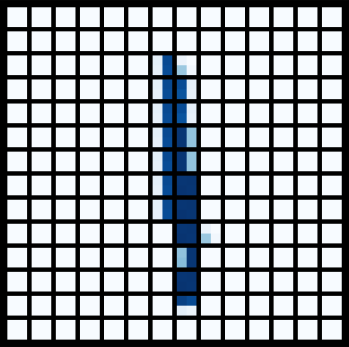

In [10]:
y = model(x.unsqueeze(0).cuda()).logits.argmax(dim=-1).cpu()
mnist.plot_sample(y)